In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import mglearn as mglearn

In [ ]:
new_df = pd.read_csv('final_comments_df.csv')


In [21]:
# new_df[['sentiment_score']].describe()

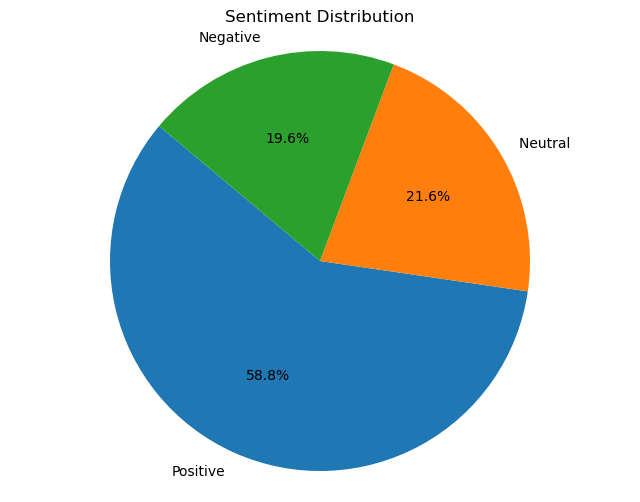

In [3]:

sentiment_distribution = new_df['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(sentiment_distribution, labels=sentiment_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.axis('equal')
plt.show()

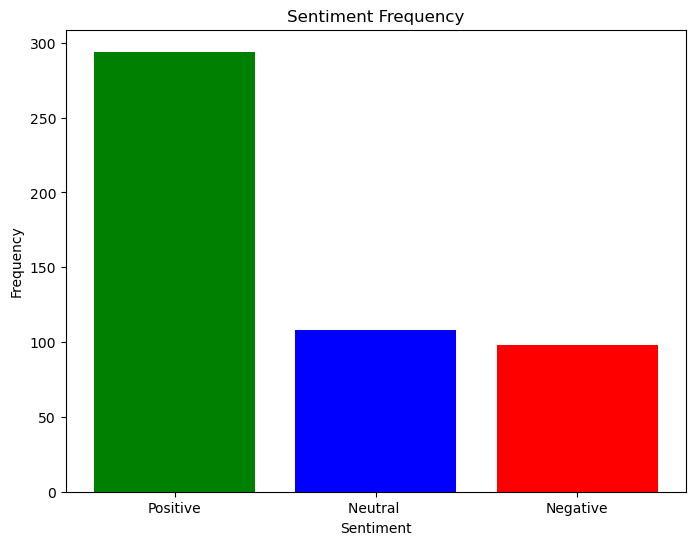

In [4]:
plt.figure(figsize=(8, 6))
plt.bar(sentiment_distribution.index, sentiment_distribution.values, color=['green','blue', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Sentiment Frequency')
plt.show()


(-0.5, 799.5, 399.5, -0.5)

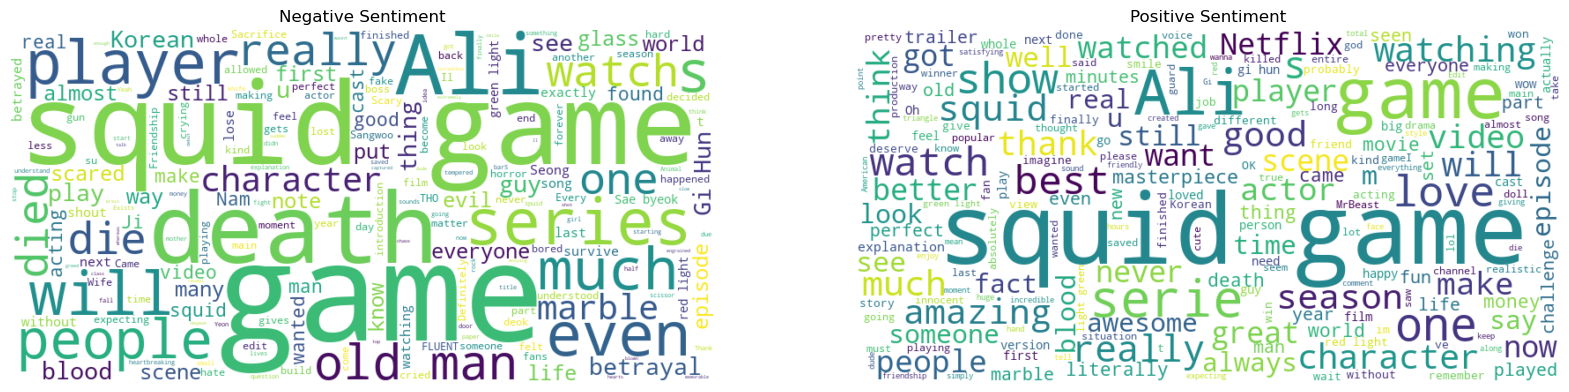

In [5]:
positive = ''.join(new_df[new_df['sentiment'] == 'Positive']['c_text'])
negative = ''.join(new_df[new_df['sentiment'] == 'Negative']['c_text'])

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Sentiment')
plt.axis('off')

plt.subplot(1, 2, 2)
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Sentiment')
plt.axis('off')

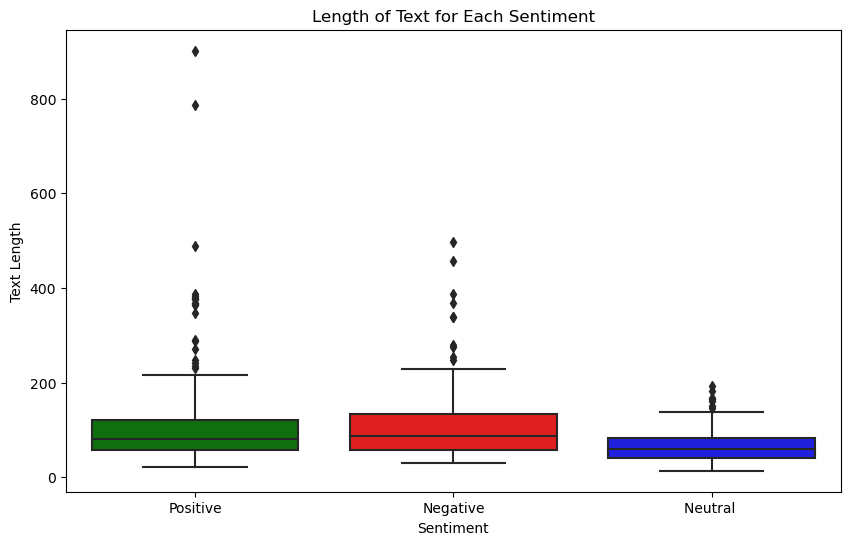

In [22]:
new_df['text_length'] = new_df['c_text'].apply(len)


colors = {"Positive":"green", "Negative":"red", "Neutral":"blue"}

plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='text_length', data=new_df, palette=colors.values())
plt.title('Length of Text for Each Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Text Length')
plt.show()

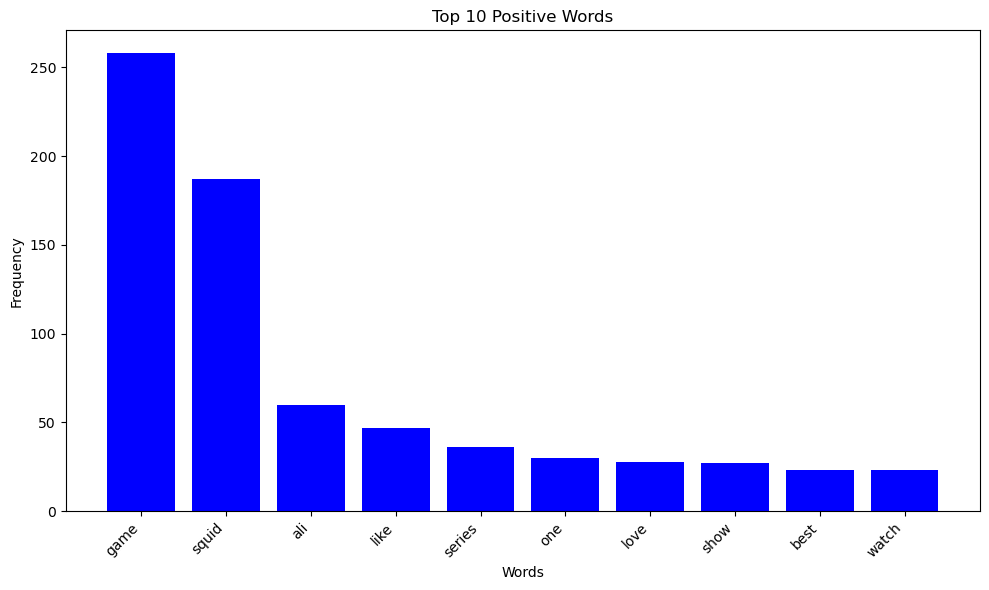

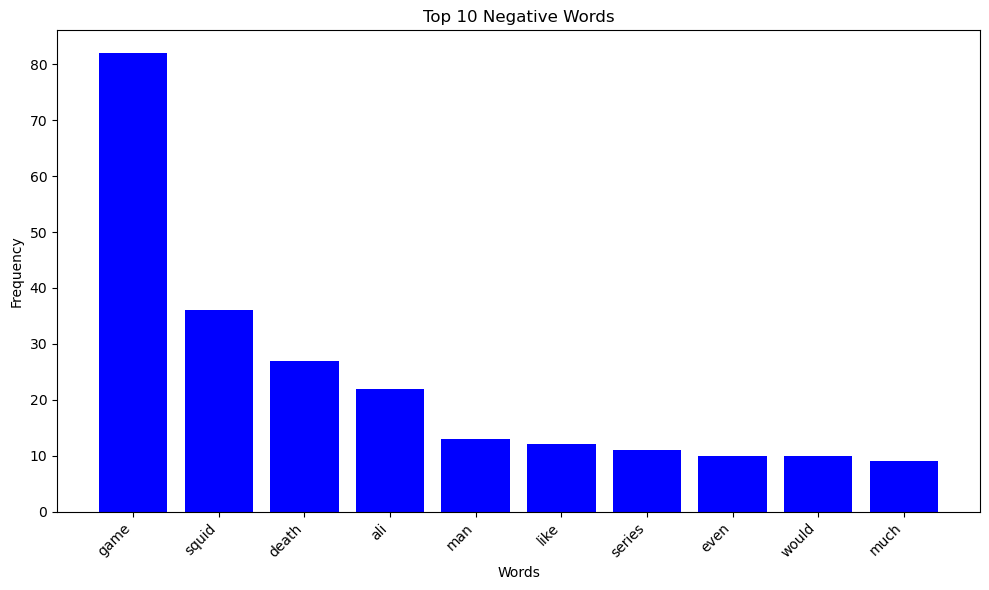

In [6]:
# sentiments = new_df['sentiment']
# texts = new_df['c_text']

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Tokenize and convert to lowercase
    # Filter out stopwords and punctuation
    tokens = [token for token in tokens if token.isalnum() and token not in stop_words]
    return tokens

new_df['processed_text'] = new_df['c_text'].apply(preprocess_text)

positive_word_freq = {}
negative_word_freq = {}

# get word and udpdate frequency depending on the sentiment
for i, row in new_df.iterrows():
    sentiment = row['sentiment']
    for word in row['processed_text']:
        if sentiment == 'Positive':
            positive_word_freq[word] = positive_word_freq.get(word, 0) + 1
        elif sentiment == 'Negative':
            negative_word_freq[word] = negative_word_freq.get(word, 0) + 1

# sort values from dict and get top 10
top_10_positive_words = sorted(positive_word_freq.items(), key=lambda x: x[1], reverse=True)[:10]
top_10_negative_words = sorted(negative_word_freq.items(), key=lambda x: x[1], reverse=True)[:10]

# plot graphs
def plot_top_words(top_words, title):
    words, frequencies = zip(*top_words)
    plt.figure(figsize=(10, 6))
    plt.bar(words, frequencies, color='blue')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

plot_top_words(top_10_positive_words, 'Top 10 Positive Words')
plot_top_words(top_10_negative_words, 'Top 10 Negative Words')

